In [1]:
import pickle
def mkPikle(filename, content):
    with open(filename, 'wb') as f:
        pickle.dump(content, f)
        f.close()
        
def rdPickle(filename):
    with open(filename, 'rb') as f:
        return pickle.load(f)

Task 1: exclude stopwords. Identify **relative** frequency of lexical words before and after lockdown (data before 2020 and after 2020).

e.g. 1. the lexical word virus (tokens: viruses, virus, etc.) is used 20% per 10000 Tweets before lockdown and 30% after lockdown.<br>
e.g.2 mask is used is used 10% per 10000 Tweets before lockdown and 30% after lockdown.<br>
e.g.3 covid is used 0% before and 20 % after per 1000 Tweets <br>
e.g. 4 distance is used 20% per 10000 Tweets before lockdown and 30% after lockdown.<br>

Theoretical implication: the higher the change in frequency, the more probable is that a word arises in a new topic and/or has a new language use. 

Run n-gram or collocation analysis of the words with the highest frequency difference

Prediction: If a word appears with a new meaning, it will show differences in n-gram/collocations.

e.g. distance will appear with social as in social distancing after but not before the lockdown. 


In [2]:
import pandas as pd
#pd.set_option('display.max_columns', None)  # or 1000
pd.set_option('display.max_rows', 200)  # or 1000
pd.set_option('display.max_colwidth', None)  # or 199

In [3]:
lstTexts        = rdPickle('pickle/2021-4/lstTexts.pkl')
df_lock         = rdPickle('pickle/2021-4/df_lock.pkl')
countVector     = rdPickle('pickle/2021-4/countVector.pkl')
countVectorizer = rdPickle('pickle/2021-4/countVectorizer.pkl')
df_lock_summary = rdPickle('pickle/2021-4/df_lock_summary.pkl')
dicCV_lock      = rdPickle('pickle/2021-4/dicCV_lock.pkl')

lstTextToken        = rdPickle('pickle/2021-4/lstTextToken.pkl')
lstTextToken_org    = rdPickle('pickle/2021-4/lstTextToken_org.pkl')

#count_vect_df   = rdPickle('pickle/2021-4/count_vect_df.pkl')
lstCleanTxt2        = rdPickle('pickle/2021-4/lstCleanTxt2.pkl')
df_rf_combined   =  rdPickle('pickle/2021-4/df_rf_combined.pkl')

df_old_summary   = rdPickle('pickle/before_lock/df_old_summary.pkl')
columns_before   = rdPickle('pickle/before_lock/columns.pkl' )

top_100          = rdPickle('pickle/2021-4/top_100.pkl')

/tmp/ipykernel_9269/266450977.py:9: DeprecationWarning: Please use `csr_matrix` from the `scipy.sparse` namespace, the `scipy.sparse.csr` namespace is deprecated.
  return pickle.load(f)


In [4]:
from bertopic import BERTopic
# load Bertopic
modelT = BERTopic.load("pickle/2021-4/modelBertTopic")
dicTopWords  = rdPickle('pickle/2021-4/dicTopWords.pkl')
setTopWords  = rdPickle('pickle/2021-4/setTopWords.pkl')
dfTp         = rdPickle('pickle/2021-4/dfTp.pkl')
topics       = rdPickle('pickle/2021-4/topics.pkl')
probabilities= rdPickle('pickle/2021-4/probabilities.pkl')
df_TCheck    = rdPickle('pickle/2021-4/df_TCheck.pkl')

In [5]:
from gensim.models import Word2Vec
# load model
model = Word2Vec.load('pickle/2021-4/model.bin')
print(model)

Word2Vec(vocab=87968, vector_size=100, alpha=0.025)


Step 1 :Read the file

In [ ]:
import pandas as pd
import os
#df_lock = pd.read_json(open( "/home/dell/workCode/Phd_works/topic_modeling/Covid_paper_work/data/after_lockdown/combined.json", 
                            "r", encoding="utf8"), lines=True)

In [6]:
df_lock.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76008 entries, 0 to 76007
Data columns (total 37 columns):
 #   Column                     Non-Null Count  Dtype              
---  ------                     --------------  -----              
 0   created_at                 76008 non-null  datetime64[ns, UTC]
 1   id                         76008 non-null  int64              
 2   id_str                     76008 non-null  int64              
 3   text                       76008 non-null  object             
 4   source                     76008 non-null  object             
 5   truncated                  76008 non-null  bool               
 6   in_reply_to_status_id      1004 non-null   float64            
 7   in_reply_to_status_id_str  1004 non-null   float64            
 8   in_reply_to_user_id        1477 non-null   float64            
 9   in_reply_to_user_id_str    1477 non-null   float64            
 10  in_reply_to_screen_name    1477 non-null   object             
 11  us

In [86]:
#df_2021.groupby
df_lock.groupby(['lang']).agg({"text": ['count']})

,text
,count
lang,
en,76008


In [ ]:
df_lock.groupby(df_lock.timestamp_ms.dt.date).agg({"text": ['count']})

In [ ]:
df_lock.timestamp_ms.dt.date.value_counts()

In [8]:
df_lock['place'].apply(pd.Series).country.value_counts()[:10]

United States                  56101
Canada                          4354
United Kingdom                  2790
Australia                       1426
Nigeria                          785
Republic of the Philippines      577
Indonesia                        501
India                            447
New Zealand                      413
Brasil                           404
Name: country, dtype: int64

In [13]:
df_lock.head()

,created_at,id,id_str,text,source,truncated,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,...,timestamp_ms,display_text_range,extended_entities,extended_tweet,quoted_status_id,quoted_status_id_str,quoted_status,quoted_status_permalink,text_clean_v2,text_clean_v1
0,2020-02-02 23:00:00+00:00,1224105213788852227,1224105213788852224,"Win, lose, or tie, Steelers fan till I die 💛🖤🏈 @ Monaghan's Sports Pub &amp; Grill https://t.co/ijw6AsCG13","<a href=""http://instagram.com"" rel=""nofollow"">Instagram</a>",False,NaN,NaN,NaN,NaN,...,2020-02-02 23:00:00.399,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[win, lose, tie, steelers, fan, till, die, monaghan, sports, pub, amp, grill]","[win, lose, or, tie, steelers, fan, till, i, die, monaghan, s, sports, pub, amp, grill]"
1,2020-02-02 23:00:00+00:00,1224105216276094977,1224105216276094976,"Wind 10.1 mph WNW. Barometer 1004.27 hPa, Rising slowly. Temperature 8.8 °C. Rain today 0.2mm. Humidity 83%","<a href=""http://sandaysoft.com/"" rel=""nofollow"">Sandaysoft Cumulus</a>",False,NaN,NaN,NaN,NaN,...,2020-02-02 23:00:00.992,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[wind, mph, wnw, barometer, hpa, rising, slowly, temperature, c, rain, today, mm, humidity]","[wind, mph, wnw, barometer, hpa, rising, slowly, temperature, c, rain, today, mm, humidity]"
2,2020-02-02 23:00:01+00:00,1224105217999822848,1224105217999822848,"Wind 7.9 mph W. Barometer 29.95 in, Steady. Temperature 48.4 °F. Rain today 0.00 in. Humidity 15%","<a href=""http://sandaysoft.com/"" rel=""nofollow"">Sandaysoft Cumulus</a>",False,NaN,NaN,NaN,NaN,...,2020-02-02 23:00:01.403,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[wind, mph, w, barometer, steady, temperature, f, rain, today, humidity]","[wind, mph, w, barometer, in, steady, temperature, f, rain, today, in, humidity]"
3,2020-02-02 23:00:01+00:00,1224105219954368512,1224105219954368512,#Carpool #Tumwater -&gt; #CrystalMountain rideshare 1 Seat offered #splitcosts #taketurns https://t.co/J6WZVIpvEL,"<a href=""https://www.carpoolworld.com"" rel=""nofollow"">CarpoolWorld Feed</a>",False,NaN,NaN,NaN,NaN,...,2020-02-02 23:00:01.869,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[carpool, tumwater, gt, crystalmountain, rideshare, seat, offered, splitcosts, taketurns]","[carpool, tumwater, gt, crystalmountain, rideshare, seat, offered, splitcosts, taketurns]"
4,2020-02-02 23:00:01+00:00,1224105220176850944,1224105220176850944,"22:48 Temp. 10°C, Hum. 83%, Dewp. 6.4°C, Bar. 1010.7 hpa, Rain Today 6.4000 mm","<a href=""http://plus.meteoware.com/netatmo/"" rel=""nofollow"">MeteoWare Plus+</a>",False,NaN,NaN,NaN,NaN,...,2020-02-02 23:00:01.922,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[temp, c, hum, dewp, c, bar, hpa, rain, today, mm]","[temp, c, hum, dewp, c, bar, hpa, rain, today, mm]"



Pre-processing text data

Most of the text data are cleaned by following below steps.

    Remove punctuations
    Tokenization - Converting a sentence into list of words
    Remove stopwords
    Lammetization/stemming - Tranforming any form of a word to its root word



Another Cleanup which removes web links

In [14]:
import re, string, unicodedata
import nltk
import contractions
import inflect
from nltk import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer, WordNetLemmatizer

def replace_contractions(text):
    # creating an empty list
    expanded_words = []    
    for word in text.split():
      # using contractions.fix to expand the shotened words
      expanded_words.append(contractions.fix(word))   
    expanded_text = ' '.join(expanded_words)
    """Replace contractions in string of text"""
    return expanded_text

def remove_URL(sample):
    """Remove URLs from a sample string"""
    return re.sub(r"http\S+", "", sample)

def remove_non_ascii(words):
    """Remove non-ASCII characters from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = unicodedata.normalize('NFKD', word).encode('ascii', 'ignore').decode('utf-8', 'ignore')
        new_words.append(new_word)
    return new_words

def to_lowercase(words):
    """Convert all characters to lowercase from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = word.lower()
        new_words.append(new_word)
    return new_words


def remove_punctuation(words):
    """Remove punctuation from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = re.sub(r'[^\w\s]', '', word)
        if new_word != '':
            new_words.append(new_word)
    return new_words

def replace_numbers(words):
    """Replace all interger occurrences in list of tokenized words with textual representation"""
    p = inflect.engine()
    new_words = []
    for word in words:
        if word.isdigit():
            new_word = p.number_to_words(word)
            new_words.append(new_word)
        else:
            new_words.append(word)
    return new_words

def remove_stopwords(words):
    """Remove stop words from list of tokenized words"""
    new_words = []
    for word in words:
        if word not in stopwords.words('english'):
            new_words.append(word)
    return new_words

def stem_words(words):
    """Stem words in list of tokenized words"""
    stemmer = LancasterStemmer()
    stems = []
    for word in words:
        stem = stemmer.stem(word)
        stems.append(stem)
    return stems

def lemmatize_verbs(words):
    """Lemmatize verbs in list of tokenized words"""
    lemmatizer = WordNetLemmatizer()
    lemmas = []
    for word in words:
        lemma = lemmatizer.lemmatize(word, pos='v')
        lemmas.append(lemma)
    return lemmas

# function to remove special characters
def remove_special_characters(text):
    # define the pattern to keep
    pat = r'[^a-zA-z0-9.,!?/:;\"\'\s]' 
    return re.sub(pat, '', text)

# function to remove special characters
def remove_extra_whitespace_tabs(text):
    #pattern = r'^\s+$|\s+$'
    pattern = r'^\s*|\s\s*'
    return re.sub(pattern, ' ', text).strip()

def normalize(words):
    words = remove_non_ascii(words)
    words = to_lowercase(words)
    words = remove_punctuation(words)
    
    #words = replace_numbers(words)
    words = remove_stopwords(words)
    return words

def normalize1(words):
    words = remove_non_ascii(words)
    words = to_lowercase(words)
    words = remove_punctuation(words)
    #words = replace_numbers(words)
    #words = remove_stopwords(words)
    return words

def preprocess(sample):
    sample = remove_URL(sample)
    sample = replace_contractions(sample)
    # Tokenize
    words = nltk.word_tokenize(sample)

    # Normalize
    return normalize(words)


In [15]:

def clean_text_v2(text):
    text = remove_URL(text)
    text = replace_contractions(text)
    text = re.sub('[0-9]+', '', text) # remove number
    
    # Tokenize
    tokens = nltk.word_tokenize(text)
    # Normalize With stopwords removal
    words = normalize(tokens)

    return words

In [16]:
# Keeping the original text structure
def clean_text_v1(text):
    text = remove_URL(text)
    text = replace_contractions(text)
    text = re.sub('[0-9]+', '', text) # remove number
    text = remove_special_characters(text) # Special char
    text = remove_extra_whitespace_tabs(text) # Extra whitespace
    
    # Tokenize
    tokens = nltk.word_tokenize(text)
    # Normalize
    words = normalize1(tokens)

    return words

In [11]:
#df_2021_en.info()

In [ ]:
# i =0 
# for txt in df_2021_en['text'][:43719].tolist():
#     print(i, replace_contractions(txt))
#     i = i + 1

Create a new column with cleaned text

In [ ]:
#df_lock['text_clean_v2'] = df_lock['text'].apply(lambda x: clean_text_v2(x))

In [ ]:
#df_lock['text_clean_v1'] = df_lock['text'].apply(lambda x: clean_text_v1(x))

In [17]:
df_lock[['text', 'text_clean_v1','text_clean_v2']][:10]

,text,text_clean_v1,text_clean_v2
0,"Win, lose, or tie, Steelers fan till I die 💛🖤🏈 @ Monaghan's Sports Pub &amp; Grill https://t.co/ijw6AsCG13","[win, lose, or, tie, steelers, fan, till, i, die, monaghan, s, sports, pub, amp, grill]","[win, lose, tie, steelers, fan, till, die, monaghan, sports, pub, amp, grill]"
1,"Wind 10.1 mph WNW. Barometer 1004.27 hPa, Rising slowly. Temperature 8.8 °C. Rain today 0.2mm. Humidity 83%","[wind, mph, wnw, barometer, hpa, rising, slowly, temperature, c, rain, today, mm, humidity]","[wind, mph, wnw, barometer, hpa, rising, slowly, temperature, c, rain, today, mm, humidity]"
2,"Wind 7.9 mph W. Barometer 29.95 in, Steady. Temperature 48.4 °F. Rain today 0.00 in. Humidity 15%","[wind, mph, w, barometer, in, steady, temperature, f, rain, today, in, humidity]","[wind, mph, w, barometer, steady, temperature, f, rain, today, humidity]"
3,#Carpool #Tumwater -&gt; #CrystalMountain rideshare 1 Seat offered #splitcosts #taketurns https://t.co/J6WZVIpvEL,"[carpool, tumwater, gt, crystalmountain, rideshare, seat, offered, splitcosts, taketurns]","[carpool, tumwater, gt, crystalmountain, rideshare, seat, offered, splitcosts, taketurns]"
4,"22:48 Temp. 10°C, Hum. 83%, Dewp. 6.4°C, Bar. 1010.7 hpa, Rain Today 6.4000 mm","[temp, c, hum, dewp, c, bar, hpa, rain, today, mm]","[temp, c, hum, dewp, c, bar, hpa, rain, today, mm]"
5,"0.6 °C, flau vind (0.5 m/s)","[c, flau, vind, ms]","[c, flau, vind, ms]"
6,#Carpool #EastWindsor -&gt; #Windsor rideshare #splitcosts https://t.co/IkxyU8E6Jc,"[carpool, eastwindsor, gt, windsor, rideshare, splitcosts]","[carpool, eastwindsor, gt, windsor, rideshare, splitcosts]"
7,DOING DOING DOING DOING DOING DOING DOING DOING DOING DOING DOING DOING (0:00 uur),"[doing, doing, doing, doing, doing, doing, doing, doing, doing, doing, doing, doing, uur]",[uur]
8,ding ding ding ding DONG DONG DONG DONG DONG DONG DONG DONG DONG DONG DONG DONG!!!!!!!!!!!!,"[ding, ding, ding, ding, dong, dong, dong, dong, dong, dong, dong, dong, dong, dong, dong, dong]","[ding, ding, ding, ding, dong, dong, dong, dong, dong, dong, dong, dong, dong, dong, dong, dong]"
9,66.7F (Feels: 63.0F) - Humidity: 56% - Wind: 9.0mph SSW - Gust: 10.9mph - Pressure: 30.220in #weather https://t.co/75yzNJ23Eh,"[f, feels, f, humidity, wind, mph, ssw, gust, mph, pressure, in, weather]","[f, feels, f, humidity, wind, mph, ssw, gust, mph, pressure, weather]"


Passing through count vectorization

In [18]:
#lstTexts = df_lock['text_clean_v2'].apply(lambda x: " ".join(x)).tolist()
lstTexts[:2]

['win lose tie steelers fan till die monaghan sports pub amp grill',
 'wind mph wnw barometer hpa rising slowly temperature c rain today mm humidity']

In [19]:
import itertools
#lstTextToken = df_lock['text_clean_v2'].tolist()
#lstTextToken = list(itertools.chain.from_iterable(lstTextToken))
lstTextToken[:1],len(lstTextToken)

(['win'], 713902)

In [20]:
# Keeping the original text
#lstTextToken_org = df_lock['text_clean_v1'].tolist()
#lstTextToken_org = list(itertools.chain.from_iterable(lstTextToken_org))
lstTextToken_org[:10], len(lstTextToken_org)

(['win',
  'lose',
  'or',
  'tie',
  'steelers',
  'fan',
  'till',
  'i',
  'die',
  'monaghan'],
 1090148)

In [21]:
#lstCleanTxt2 = [" ".join(x) for x in df_lock['text_clean_v2'].tolist()]
lstCleanTxt2[:2]

['win lose tie steelers fan till die monaghan sports pub amp grill',
 'wind mph wnw barometer hpa rising slowly temperature c rain today mm humidity']

In [ ]:
#mkPikle('pickle/2021-4/lstCleanTxt2.pkl', lstCleanTxt2)

In [ ]:
# Saving the pickle
#mkPikle('pickle/2021-4/lstTextToken.pkl', lstTextToken)
#mkPikle('pickle/2021-4/lstTextToken_org.pkl', lstTextToken_org)

In [17]:
from sklearn.feature_extraction.text import CountVectorizer
countVectorizer = CountVectorizer() 
countVector = countVectorizer.fit_transform(lstTexts)

In [18]:
countVector[:2]

<2x87243 sparse matrix of type '<class 'numpy.int64'>'
	with 24 stored elements in Compressed Sparse Row format>

In [19]:
columns=countVectorizer.get_feature_names()

In [20]:
len(columns)

87243

In [21]:
#mkPikle('pickle/2021-4/columns.pkl', columns)

In [22]:
columns_before   = rdPickle('pickle/before_lock/columns.pkl' )

In [23]:
#df_old_summary   = rdPickle('pickle/before_lock/df_old_summary.pkl')

In [24]:
df_old_summary[:3]

,word,total_occur,number_docs,rf,total,dicVal
0,__,20.0,16.0,0.000250,80082.0,0.003996
1,___,9.0,7.0,0.000112,80082.0,0.000787
2,____,7.0,7.0,0.000087,80082.0,0.000612


In [25]:
#columns_before

Working with all the words and creating a rf Sorted list

In [26]:
setWordsTotal = set(columns)

In [27]:
setWordsTotal.update(columns_before)  # set

In [28]:
len(setWordsTotal)

151632

In [29]:
list(setWordsTotal)[:10]

['wafers',
 'bigspanish',
 'egift',
 'duncanny',
 'froth',
 'portland',
 'onedaylagogo',
 'sana',
 'gorillazoe',
 'mousse']

In [ ]:
# from tqdm.notebook import tqdm_notebook

# df_rf_combined = pd.DataFrame(columns=['word', 'rf_before', 'rf_after', 'rf_diff'])

# for wrd in tqdm_notebook(list(setWordsTotal)):  
    
#     rf_old = df_old_summary[df_old_summary.word==wrd]['rf'].tolist()[0] if len(df_old_summary[df_old_summary.word==wrd]['rf'].tolist())> 0 else 0
#     rf_new = df_lock_summary[df_lock_summary.word==wrd]['rf'].tolist()[0] if len(df_lock_summary[df_lock_summary.word==wrd]['rf'].tolist())> 0 else 0
#     print( wrd, rf_old)
#     diff_rf = rf_new-rf_old
#     df_rf_combined.loc[-1] = [wrd, rf_old, rf_new, diff_rf]  # adding a row
#     df_rf_combined.index = df_rf_combined.index + 1  # shifting index
#     df_rf_combined = df_rf_combined.sort_index()  # sorting by index

In [30]:
df_top_rf = df_rf_combined.sort_values(by=['rf_diff'], ascending=False)[:100]

In [31]:
df_top_rf[:2]

,word,rf_before,rf_after,rf_diff
132045,home,0.011713,0.036404,0.024691
65248,quarantine,0,0.019630,0.019630


In [ ]:
#df_top_rf['rf_diff'].tolist()

In [32]:
# Set the figure size - handy for larger output
from matplotlib import pyplot as plt
plt.rcParams["figure.figsize"] = [15, 6]
# Set up with a higher resolution screen (useful on Mac)
%config InlineBackend.figure_format = 'retina'

In [33]:

plotdata = pd.DataFrame(
    {"rf Increase": df_top_rf['rf_diff'].tolist()}, 
    index=df_top_rf['word'].tolist())

In [34]:
df_top_rf= df_top_rf.reset_index(drop=True)

<AxesSubplot:>

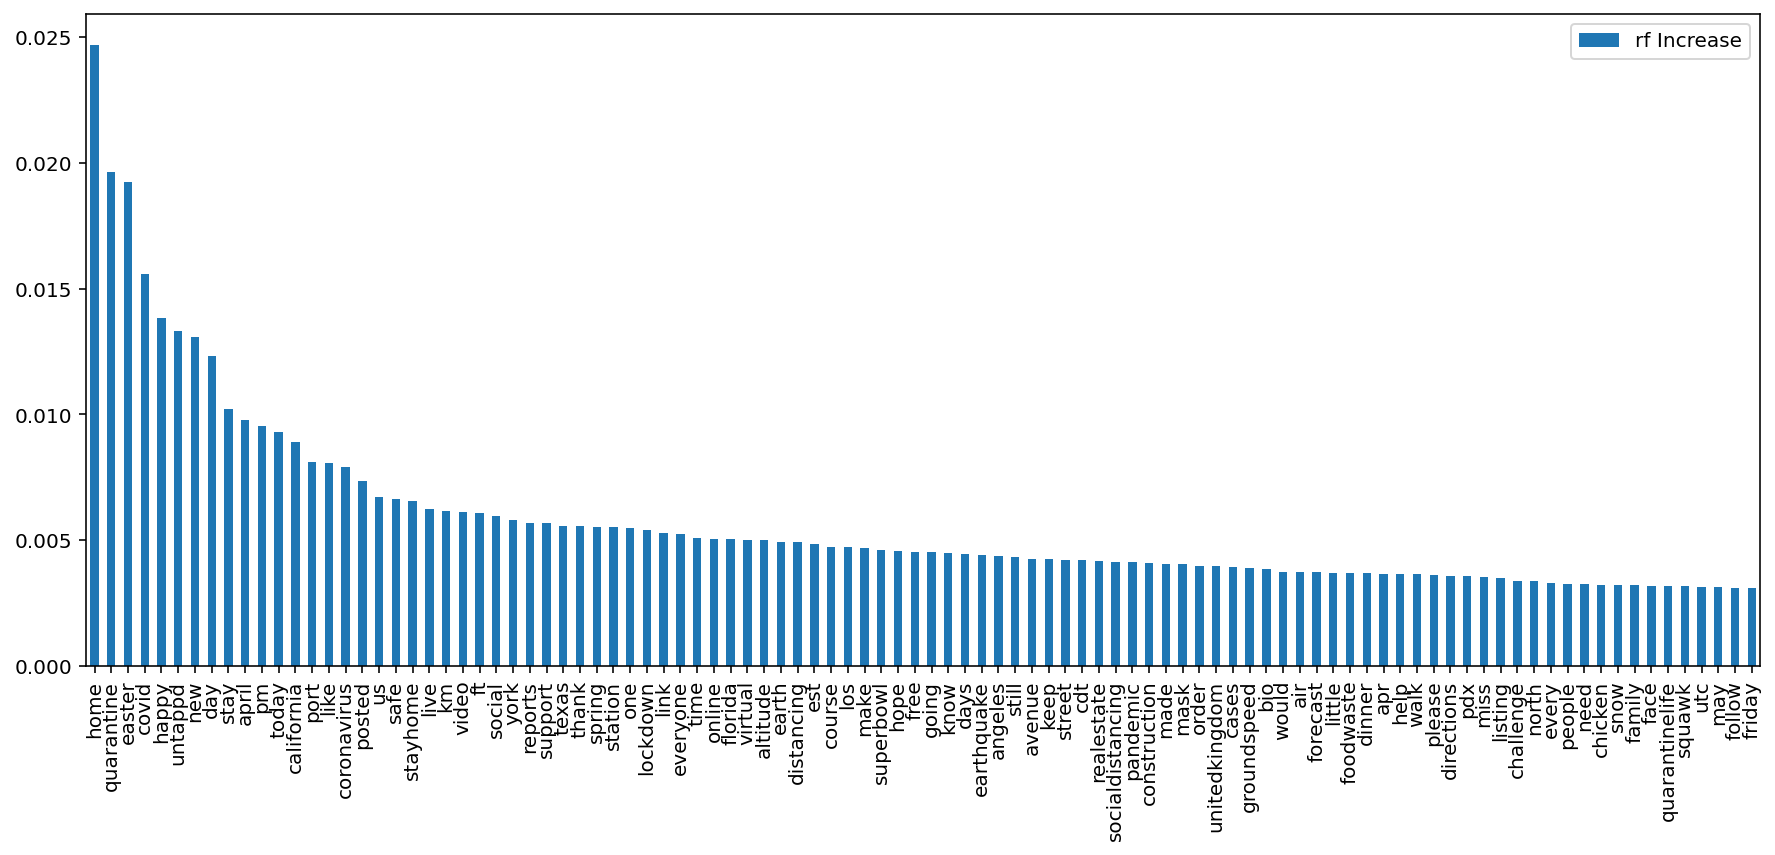

In [35]:
plotdata.plot(kind="bar")

In [ ]:
#mkPikle('pickle/2021-4/df_rf_combined.pkl', df_rf_combined)

Working with Count vectors

In [36]:
count_vect_df = pd.DataFrame(countVector.toarray(), columns=columns)

In [37]:
#count_vect_df.columns
count_vect_df[:2]

,1000,12pm,12story,1st,2015,2020,24,412,6p,__,...,zza,zzazzproduction,zzoey,zztopper,zzward,zzyzx,zzz,zzzmoment,zzzwalking,zzzz
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Saving to pickle

In [ ]:
#mkPikle('pickle/2021-4/lstTexts.pkl', lstTexts)
#mkPikle('pickle/2021-4/df_lock.pkl', df_lock)
# mkPikle('pickle/2021-4/countVector.pkl', countVector)
# mkPikle('pickle/2021-4/countVectorizer.pkl', countVectorizer)


In [ ]:
#mkPikle('pickle/2021-4/count_vect_df.pkl', count_vect_df)

In [ ]:
#mkPikle('pickle/2021-4/dicCV_lock.pkl', dicCV_lock)
#mkPikle('pickle/2021-4/df_lock_summary.pkl', df_lock_summary)

In [38]:
import numpy as np
def getTermValue(wrd):
    lstCV = count_vect_df[wrd].tolist()
    #print(lstCV)
    total_occur = sum(lstCV)
    number_doc  = np.count_nonzero(lstCV)
    return total_occur, number_doc, len(lstCV)
    #return( total_occur * number_doc / len(lstCV))

In [39]:
getTermValue('work')

(1885, 1851, 76008)

In [40]:
# import pandas as pd
# dicCV_lock = {}
# #create dataframe
# df_lock_summary = pd.DataFrame({})

# for colVal in columns:
#     print(colVal) 
#     total_occur, number_doc, total = getTermValue(colVal)
#     rf = total_occur/ total
#     #Add in the dictionary
#     dicVal = (total_occur * number_doc) / total
#     dicCV_lock[colVal] = dicVal
#     # add row
#     new_row = {'word':colVal, 'total_occur':total_occur, 'number_docs':number_doc, 'total':total, 
#                'rf':rf, 'dicVal': dicVal}
#     df_lock_summary = df_lock_summary.append(new_row, ignore_index=True)



In [41]:
sorted(dicCV_lock.items(), key=lambda kv: kv[1],reverse=True)

[('job', 326.13380170508367),
 ('new', 240.25694663719608),
 ('like', 195.98489632670245),
 ('day', 172.02644458478056),
 ('today', 124.91806125670982),
 ('amp', 114.59985790969371),
 ('link', 101.20382065045784),
 ('us', 100.2414482686033),
 ('home', 97.23525155246816),
 ('see', 96.76349857909693),
 ('posted', 92.25218398063362),
 ('click', 89.89832649194821),
 ('bio', 84.84712135564678),
 ('photo', 83.48259393748026),
 ('time', 79.65236554046942),
 ('pm', 72.85588359120092),
 ('drinking', 69.29482422902852),
 ('happy', 62.248631722976526),
 ('one', 55.30438901168298),
 ('love', 54.4785680454689),
 ('great', 47.26476160404168),
 ('apply', 46.931691400905166),
 ('work', 45.904838964319545),
 ('latest', 43.19734764761604),
 ('ca', 40.22000315756236),
 ('get', 37.18703294390064),
 ('hiring', 34.59191137774971),
 ('good', 32.15227344490054),
 ('th', 31.6277233975371),
 ('california', 30.356344069045363),
 ('want', 29.738395958320176),
 ('quarantine', 28.246868750657825),
 ('looking', 27.9

In [42]:
# lst_100 = sorted(dicCV_lock.items(), key=lambda kv: kv[1],reverse=True)[:100]
# # Creating a top 100 set of words 
# top_100 = list(map(lambda x: x[0], lst_100))
top_100[:5]

['job', 'new', 'like', 'day', 'today']

In [43]:
#mkPikle('pickle/2021-4/top_100.pkl', top_100)

In [44]:
df_lock_summary[(df_lock_summary.total_occur>2) & (df_lock_summary.number_docs>3) 
                & (df_lock_summary.word.str.len()>2) & (df_lock_summary.dicVal>1)][:2]

,word,total_occur,number_docs,total,rf,dicVal
1331,ago,410.0,408.0,76008.0,0.005394,2.200821
1466,air,543.0,541.0,76008.0,0.007144,3.864896


In [45]:
df_lock_summary[(df_lock_summary.total_occur>2) & (df_lock_summary.number_docs>3) 
                & (df_lock_summary.word.str.len()>2) & (df_lock_summary.dicVal>1)].count()

word           349
total_occur    349
number_docs    349
total          349
rf             349
dicVal         349
dtype: int64

In [46]:
df_lock_summary.count()

word           87243
total_occur    87243
number_docs    87243
total          87243
rf             87243
dicVal         87243
dtype: int64

In [47]:
df_lock_summary[(df_lock_summary.total_occur>2) & (df_lock_summary.number_docs>3) 
                 & (df_lock_summary.dicVal>1)].sort_values(by=['total_occur'], ascending=False)[:50]

,word,total_occur,number_docs,total,rf,dicVal
39650,job,5061.0,4898.0,76008.0,0.066585,326.133802
52621,new,4509.0,4050.0,76008.0,0.059323,240.256947
44148,like,3983.0,3740.0,76008.0,0.052402,195.984896
19107,day,3722.0,3513.0,76008.0,0.048969,172.026445
78558,today,3111.0,3052.0,76008.0,0.040930,124.918061
2560,amp,3066.0,2841.0,76008.0,0.040338,114.599858
81410,us,2824.0,2698.0,76008.0,0.037154,100.241448
44362,link,2775.0,2772.0,76008.0,0.036509,101.203821
34940,home,2767.0,2671.0,76008.0,0.036404,97.235252
67965,see,2724.0,2700.0,76008.0,0.035838,96.763499


In [48]:
df_lock_summary[df_lock_summary.word.isin(
    ['covid','virus','quarantine','lockdown','mask', 'distance','corona'])]

,word,total_occur,number_docs,total,rf,dicVal
16685,corona,228.0,225.0,76008.0,0.003000,0.674929
17112,covid,1185.0,1138.0,76008.0,0.015590,17.741948
20859,distance,128.0,128.0,76008.0,0.001684,0.215556
44846,lockdown,411.0,393.0,76008.0,0.005407,2.125079
47386,mask,324.0,305.0,76008.0,0.004263,1.300126
61732,quarantine,1492.0,1439.0,76008.0,0.019630,28.246869
82556,virus,132.0,131.0,76008.0,0.001737,0.227502


In [6]:
df_lock_summary[df_lock_summary.word.isin(
    ['covid'])]

,word,total_occur,number_docs,total,rf,dicVal
17112,covid,1185.0,1138.0,76008.0,0.01559,17.741948


In [7]:
import nltk
from nltk.collocations import * 

def getColocation(text, cls, typeText):
    if typeText=="org":
        lstText = lstTextToken_org
    else:
        lstText = lstTextToken
    # Ngrams with 'creature' as a member
    bigram_measures = nltk.collocations.BigramAssocMeasures()
    trigram_measures = nltk.collocations.TrigramAssocMeasures()# Ngrams with 'creature' as a member
    
    ## Bigrams
    finder2 = BigramCollocationFinder.from_words(lstText)
    finder3 = TrigramCollocationFinder.from_words(lstTextToken)


    if cls==2:
        cls = bigram_measures
        finder = finder2
    else:
        cls = trigram_measures
        finder = finder3
        
    creature_filter = lambda *w: text not in w

    # only bigrams that appear 3+ times
    #finder.apply_freq_filter(2)

    # only bigrams that contain 'creature'
    finder.apply_ngram_filter(creature_filter)

    # return the 10 n-grams with the highest PMI
    print (finder.nbest(cls.likelihood_ratio, 50))
    
    count = 0 
    
    for i in finder.score_ngrams(cls.likelihood_ratio):
        if count ==50:
            break;
        print (i) 
        count = count + 1

In [8]:
getColocation("quarantine",2,"org")

[('during', 'quarantine'), ('quarantine', 'day'), ('quarantine', 'quarantinelife'), ('this', 'quarantine'), ('quarantine', 'stayhome'), ('of', 'quarantine'), ('self', 'quarantine'), ('quarantine', 'has'), ('quarantine', 'life'), ('in', 'quarantine'), ('quarantinelife', 'quarantine'), ('quarantine', 'carneasada'), ('covid', 'quarantine'), ('under', 'quarantine'), ('quarantine', 'got'), ('stayhome', 'quarantine'), ('the', 'quarantine'), ('quarantine', 'buddy'), ('quarantine', 'jeanferreirajf'), ('quarantine', 'cooking'), ('i', 'quarantine'), ('quarantine', 'edition'), ('quarantine', 'a'), ('quarantine', 'workfromhome'), ('my', 'quarantine'), ('quarantine', 'activity'), ('quarantine', 'the'), ('quarantine', 'is'), ('dinnerathome', 'quarantine'), ('quarantine', 'thegreattpcrisisof'), ('quarantinequote', 'quarantine'), ('pandemic', 'quarantine'), ('quarantine', 'to'), ('quarantine', 'blues'), ('quarantine', 'mood'), ('quarantine', 'cuisine'), ('quarantine', 'easter'), ('quarantine', 'dinner

In [9]:
getColocation("quarantine",3,"org")

[('link', 'bio', 'quarantine'), ('quarantine', 'link', 'bio'), ('posted', 'photo', 'quarantine'), ('quarantine', 'new', 'york'), ('new', 'york', 'quarantine'), ('untappd', 'home', 'quarantine'), ('quarantine', 'los', 'angeles'), ('quarantine', 'see', 'latest'), ('quarantine', 'recommend', 'anyone'), ('endomondo', 'endorphins', 'quarantine'), ('course', 'groundspeed', 'quarantine'), ('pm', 'cdt', 'quarantine'), ('quarantine', 'want', 'work'), ('quarantine', 'san', 'francisco'), ('san', 'francisco', 'quarantine'), ('quarantine', 'severe', 'thunderstorm'), ('foodwaste', 'free', 'quarantine'), ('quarantine', 'let', 'us'), ('quarantine', 'social', 'distancing'), ('social', 'distancing', 'quarantine'), ('pressure', 'mb', 'quarantine'), ('utc', 'quake', 'quarantine'), ('happy', 'easter', 'quarantine'), ('quarantine', 'happy', 'easter'), ('groundspeed', 'kts', 'quarantine'), ('oh', 'realestate', 'quarantine'), ('new', 'jersey', 'quarantine'), ('quarantine', 'z', 'npd'), ('north', 'carolina', '

<H1> Creating the Word embedding from the sentences</H1>

In [ ]:
# from gensim.models import Word2Vec
# # define training data
# sentences = df_lock['text_clean_v1'].tolist()
# # train model
# model = Word2Vec(sentences, min_count=1)
# # summarize the loaded model
# print(model)
# # summarize vocabulary
# words = list(model.wv.index_to_key)
# #print(words)

# # access vector for one word
# #print(model['sentence'])
# # save model
# #model.save('pickle/2021-4/model.bin')

In [10]:
model.wv.most_similar("stay",  topn=20)

[('staying', 0.9118852019309998),
 ('healthy', 0.8978225588798523),
 ('safe', 0.8843215703964233),
 ('stuck', 0.8531713485717773),
 ('mwa', 0.8448354005813599),
 ('dud', 0.8273289203643799),
 ('positive', 0.8262764811515808),
 ('tuned', 0.8162994384765625),
 ('motivated', 0.8146123290061951),
 ('together', 0.814431369304657),
 ('strong', 0.810627818107605),
 ('keep', 0.806562602519989),
 ('najwasgarden', 0.805801510810852),
 ('keeping', 0.7954886555671692),
 ('growbeard', 0.7948303818702698),
 ('whatisimportant', 0.7915679216384888),
 ('vigilant', 0.7903071641921997),
 ('solutionsfocused', 0.7872575521469116),
 ('paliecmjs', 0.7869129776954651),
 ('wapato', 0.7857635021209717)]

In [53]:
model.wv.most_similar("stayathome",  topn=20)

[('pls', 0.9339055418968201),
 ('counts', 0.9296010732650757),
 ('socialdistancing', 0.9131410121917725),
 ('chaotic', 0.9093872904777527),
 ('stayhomenz', 0.9087285399436951),
 ('usedcarsforsale', 0.9068558812141418),
 ('chronicles', 0.9047456383705139),
 ('iraq', 0.9008087515830994),
 ('wfh', 0.8982253670692444),
 ('stayhome', 0.8974696397781372),
 ('denmark', 0.8958557844161987),
 ('herd', 0.8952124118804932),
 ('aging', 0.893872857093811),
 ('tgif', 0.892949104309082),
 ('testing', 0.8929401636123657),
 ('quarantinebutmakeitfashion', 0.8890635371208191),
 ('complete', 0.8872503638267517),
 ('quarentine', 0.886475145816803),
 ('staysafe', 0.8856342434883118),
 ('yashicamm', 0.8853801488876343)]

In [54]:
model.wv.most_similar("distance",  topn=20)

[('distancing', 0.9429953098297119),
 ('practicing', 0.8778006434440613),
 ('social', 0.827724039554596),
 ('indoors', 0.8106124997138977),
 ('isolating', 0.7981964349746704),
 ('practice', 0.7940385937690735),
 ('quarantined', 0.7765623331069946),
 ('strangles', 0.7761320471763611),
 ('self', 0.7722780704498291),
 ('mummas', 0.7722686529159546),
 ('flowers', 0.769318699836731),
 ('findwellness', 0.7687652111053467),
 ('quarantines', 0.7676917910575867),
 ('gatherings', 0.7664505839347839),
 ('boys', 0.7628231644630432),
 ('girls', 0.7565768957138062),
 ('getbuiltchatt', 0.7527454495429993),
 ('fam', 0.7527003288269043),
 ('tribeswellness', 0.7510342597961426),
 ('exercise', 0.7496092319488525)]

In [55]:
model.wv.most_similar("corona",  topn=20)

[('isolation', 0.9338046312332153),
 ('socialdistancing', 0.9134480953216553),
 ('virus', 0.9089282155036926),
 ('outbreak', 0.8933596014976501),
 ('chaotic', 0.8928493857383728),
 ('complete', 0.891231894493103),
 ('aprilst', 0.8906391859054565),
 ('nature', 0.8900144696235657),
 ('lockdown', 0.8878858685493469),
 ('stayathome', 0.8830532431602478),
 ('chronicles', 0.8807380199432373),
 ('pandemic', 0.8787509202957153),
 ('period', 0.8671062588691711),
 ('selfisolation', 0.865312397480011),
 ('coronavirusargentina', 0.8647189736366272),
 ('flowers', 0.8631383776664734),
 ('rome', 0.8624476194381714),
 ('coronavirus', 0.8624119162559509),
 ('dorset', 0.8611677289009094),
 ('cancelled', 0.8610783219337463)]

In [56]:
model.wv.most_similar("covid",  topn=20)

[('coronavirus', 0.9516990780830383),
 ('lockdown', 0.8666412830352783),
 ('pandemic', 0.8664599061012268),
 ('corona', 0.8479124903678894),
 ('virus', 0.8460092544555664),
 ('fighting', 0.8131770491600037),
 ('stayhome', 0.7970401048660278),
 ('outbreak', 0.7887364029884338),
 ('empty', 0.7856820821762085),
 ('stayathome', 0.7839937806129456),
 ('chaotic', 0.7796364426612854),
 ('spread', 0.7785452604293823),
 ('isolation', 0.7764317393302917),
 ('waderlust', 0.7736772298812866),
 ('yashicamm', 0.7699462175369263),
 ('resign', 0.7693983316421509),
 ('socialdistancing', 0.7648351192474365),
 ('scottmorrisonmp', 0.7624857425689697),
 ('recovered', 0.7616180181503296),
 ('stigma', 0.7567896842956543)]

In [57]:
model.wv.most_similar("lockdown",  topn=20)

[('isolation', 0.910826563835144),
 ('corona', 0.8878857493400574),
 ('coronavirus', 0.8704858422279358),
 ('covid', 0.8666412830352783),
 ('pandemic', 0.8573558330535889),
 ('virus', 0.8549882769584656),
 ('flowers', 0.8525643944740295),
 ('complete', 0.849199116230011),
 ('notes', 0.8436908721923828),
 ('socialdistancing', 0.8411353230476379),
 ('stayathome', 0.8392567038536072),
 ('nature', 0.836660623550415),
 ('chaotic', 0.8343209028244019),
 ('under', 0.8313252329826355),
 ('season', 0.8207383155822754),
 ('jesus', 0.8177809715270996),
 ('testing', 0.81621253490448),
 ('somewhere', 0.8144302368164062),
 ('quarantine', 0.8139845132827759),
 ('rome', 0.8099263310432434)]

In [58]:
model.wv.most_similar("mask",  topn=20)

[('face', 0.9267749190330505),
 ('hair', 0.8577935695648193),
 ('touching', 0.8514016270637512),
 ('uplifting', 0.8377095460891724),
 ('masks', 0.8363457918167114),
 ('wearing', 0.8324629664421082),
 ('puzzles', 0.8312715888023376),
 ('body', 0.828205406665802),
 ('sevenpeaks', 0.8278347253799438),
 ('joy', 0.8274763226509094),
 ('self', 0.8274021744728088),
 ('hand', 0.8225932717323303),
 ('camera', 0.8197998404502869),
 ('smile', 0.8156702518463135),
 ('ones', 0.8133317232131958),
 ('become', 0.81294846534729),
 ('clean', 0.8129175305366516),
 ('mind', 0.8099125027656555),
 ('cute', 0.8094912767410278),
 ('weird', 0.8079842925071716)]

In [59]:
model.wv.most_similar("quarantine",  topn=20)

[('isolation', 0.8553900122642517),
 ('nature', 0.8517488837242126),
 ('game', 0.8227437734603882),
 ('super', 0.8156291246414185),
 ('lockdown', 0.8139845728874207),
 ('pandemic', 0.8126978278160095),
 ('life', 0.8078466653823853),
 ('corona', 0.8040329217910767),
 ('season', 0.8028600215911865),
 ('spending', 0.7991145849227905),
 ('flowers', 0.7972573637962341),
 ('whole', 0.7953183650970459),
 ('taking', 0.792644202709198),
 ('around', 0.7881123423576355),
 ('playing', 0.7859200835227966),
 ('another', 0.7856455445289612),
 ('quarantined', 0.7856339812278748),
 ('its', 0.7827494740486145),
 ('fun', 0.7827029228210449),
 ('beautiful', 0.7817038297653198)]

In [60]:
model.wv.most_similar("virus",  topn=20)

[('pandemic', 0.917922854423523),
 ('corona', 0.9089282155036926),
 ('aprilst', 0.8726319074630737),
 ('period', 0.8641219735145569),
 ('chaotic', 0.8567099571228027),
 ('lockdown', 0.8549883365631104),
 ('spread', 0.854848325252533),
 ('crisis', 0.8546954989433289),
 ('isolation', 0.8469161987304688),
 ('covid', 0.8460092544555664),
 ('fight', 0.8437996506690979),
 ('against', 0.8425062298774719),
 ('under', 0.8420250415802002),
 ('clearly', 0.8412595987319946),
 ('coronavirus', 0.8402548432350159),
 ('changed', 0.8390491604804993),
 ('season', 0.8349619507789612),
 ('words', 0.8326510190963745),
 ('complete', 0.8319549560546875),
 ('fear', 0.8312507271766663)]

<h2> Topic modeling</h2>

In [ ]:
# from bertopic import BERTopic
# modelT = BERTopic(min_topic_size=20)
# topics, probabilities = modelT.fit_transform(lstCleanTxt2)

In [53]:
len(topics)

76008

In [54]:
# 2 times reduction
#topics, probabilities = modelT.reduce_topics(lstCleanTxt2, topics, probabilities, nr_topics="auto")
#topics, probabilities = modelT.reduce_topics(lstCleanTxt2, topics, probabilities, nr_topics="auto")

In [55]:
# Saving the model
#modelT.save("pickle/2021-4/modelBertTopic")

In [6]:
dfTp= modelT.get_topic_info()
dfTp

,Topic,Count,Name
0,-1,28649,-1_click_see_day_love
1,0,3438,0_drinking_untappd_beer_home
2,1,3058,1_jobs_job_titles_follow
3,2,2147,2_music_live_song_tune
4,3,1728,3_easter_birthday_happy_bunny
...,...,...,...
217,216,22,216_shelter_place_sheltering_shelterinplace
218,217,21,217_gas_fuel_gallon_prices
219,218,21,218_skating_skate_skates_skaters
220,219,21,219_nubias_thru_drive_asada


In [13]:
dfTp['TopicWords']= dfTp.apply (lambda row: dicTopWords[row.Topic], axis=1)

In [14]:
dfTp[:-1]

,Topic,Count,Name,TopicWords
0,-1,28649,-1_click_see_day_love,"[click, see, day, love, link, california, job, today, latest, time]"
1,0,3438,0_drinking_untappd_beer_home,"[drinking, untappd, beer, home, ipa, brewing, ale, wine, stout, drink]"
2,1,3058,1_jobs_job_titles_follow,"[jobs, job, titles, follow, career, hear, like, sales, appealing, fit]"
3,2,2147,2_music_live_song_tune,"[music, live, song, tune, album, spotify, dj, podcast, soundcloud, tonight]"
4,3,1728,3_easter_birthday_happy_bunny,"[easter, birthday, happy, bunny, family, happyeaster, everyone, eggs, sunday, hope]"
...,...,...,...,...
216,215,22,215_creek_running_dipper_gordon,"[creek, running, dipper, gordon, river, watershednursery, vertigo, barnane, swallowtail, marylougreer]"
217,216,22,216_shelter_place_sheltering_shelterinplace,"[shelter, place, sheltering, shelterinplace, shelterinplacecalifornia, raleig, colliercomestogether, razinla, easterrun, ourfigkitty]"
218,217,21,217_gas_fuel_gallon_prices,"[gas, fuel, gallon, prices, tank, cheap, tcs, gallons, filled, saved]"
219,218,21,218_skating_skate_skates_skaters,"[skating, skate, skates, skaters, skateboard, xgames, skatelife, skateboards, bundy, skatepark]"


In [59]:
# Create a dictionary and set of words
# dicTopWords = {}
# setTopWords = set()

# for topic in dfTp['Topic'].tolist():
#     lstA               = [a for (a,b) in modelT.get_topic(topic)]
#     dicTopWords[topic] = lstA # dic
#     setTopWords.update(lstA)  # set

In [60]:
# mkPikle('pickle/2021-4/dicTopWords.pkl', dicTopWords)
# mkPikle('pickle/2021-4/setTopWords.pkl', setTopWords)
# mkPikle('pickle/2021-4/dfTp.pkl', dfTp)
# mkPikle('pickle/2021-4/topics.pkl', topics)
# mkPikle('pickle/2021-4/probabilities.pkl', probabilities)
#mkPikle('pickle/2021-4/df_TCheck.pkl', df_TCheck)

In [8]:
len(setTopWords)

1904

In [7]:
dicTopWords[135]

['notes',
 'unreliable',
 'lockeddown',
 'testing',
 'data',
 'poverty',
 'lockdown',
 'rate',
 'heavily',
 'adequate']

In [63]:
# finding covid related word in dictionary


In [22]:
# mystring = "3:mas1"
# if "mask" in mystring: 
#    print('success')
def getTopicsByWord(chkWord):
    for key in dicTopWords:
        #print(key)
        for word in dicTopWords[key]:
            if chkWord in word:
                print(key, dfTp[dfTp.Topic==key]['Name'].tolist()[0], dicTopWords[key], 
                      dfTp[dfTp.Topic==key]['Count'].tolist()[0])
                break

In [23]:
getTopicsByWord("mask")

18 18_mask_masks_face_skin ['mask', 'masks', 'face', 'skin', 'wear', 'facemask', 'dermatology', 'wearing', 'hand', 'gloves'] 628


In [17]:
getTopicsByWord("job")

-1 -1_click_see_day_love ['click', 'see', 'day', 'love', 'link', 'california', 'job', 'today', 'latest', 'time'] 28649
1 1_jobs_job_titles_follow ['jobs', 'job', 'titles', 'follow', 'career', 'hear', 'like', 'sales', 'appealing', 'fit'] 3058
52 52_shy_asking_score_referrals ['shy', 'asking', 'score', 'referrals', 'like', 'job', 'way', 'great', 'assistant', 'lowe'] 192
66 66_supplychain_receiverstocker_seasonal_stocking ['supplychain', 'receiverstocker', 'seasonal', 'stocking', 'lowe', 'recommend', 'overnight', 'job', 'anyone', 'latest'] 156
72 72_nervous_apply_even_match ['nervous', 'apply', 'even', 'match', 'like', 'job', 'health', 'officer', 'allied', 'universal'] 147
77 77_role_ever_like_sales ['role', 'ever', 'like', 'sales', 'job', 'associate', 'warehouse', 'retail', 'ca', 'instructor'] 123
92 92_starbucks_hospitality_restaurant_manager ['starbucks', 'hospitality', 'restaurant', 'manager', 'retail', 'team', 'job', 'barista', 'click', 'hiring'] 104
96 96_kellyservices_kellyjobs_kel

In [67]:
df_TCheck = pd.DataFrame(list(zip(lstCleanTxt2, topics)),
               columns =['text', 'topics'])

In [18]:
df_TCheck.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76008 entries, 0 to 76007
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    76008 non-null  object
 1   topics  76008 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 1.2+ MB


In [69]:
df_TCheck[(df_TCheck.topics==18)]['text'][:10]

830                              generally suffer dry patches washing face uncommon drycombination skin
1523    looking bcbe general medical dermatologist job sutter health sacramento sierra hiring auburn ca
2221                           hiring waco tx click link bio apply job dermatology physician opportunit
2885                                             mask making mardi gras world rjserves mardi gras world
5090                                 think wearing masks bike forever keeps inhaling things allergic wi
5131                  whether taking care patients riding bike sockguyluv covered fronts thanks keeping
5149             mask orders today receive stainless steel mini dumbbell keychain charge action necessa
5177                      level hydrafacial hydrafacial uses patented technology cleanse extract hydrat
5200                coming soon many thanks elske_usainvie update mask disinfectant protection newstore
5514                 peep n let ur know still gucci covid style 

In [70]:
df_TCheck[(df_TCheck.text.str.contains("stay", case=False)) ].groupby(['topics']).agg({"text": ['count']})

,text
,count
topics,
-1,974
0,46
1,2
2,60
3,68
4,28
5,89
6,25


In [71]:
df_TCheck[(df_TCheck.text.str.contains("distance", case=False)) ].groupby(['topics']).agg({"text": ['count']}).info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43 entries, -1 to 220
Data columns (total 1 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   (text, count)  43 non-null     int64
dtypes: int64(1)
memory usage: 688.0 bytes


In [9]:
global arrLst
def getTopicsDetailsByWord(txt):
    global arrLst
    txtOut = ""
    arrOut = []
    sum
    for row in df_TCheck[(df_TCheck.text.str.contains(pat = txt, regex = True, case= False)) ].groupby(['topics']).agg({"text": ['count']}).iterrows():
        rowtxt = str(row[0])+"("+ str(row[1][0])+")"
        arrOut.append(row[0])
        txtOut = txtOut + rowtxt + ", "
    print(txtOut)
    print(arrOut)
    arrLst = arrOut
    #print(dfTp[dfTp['Topic'].isin(arrOut)])

In [63]:
strPut = "mask"
strPatt = "( " + strPut + "$|^" + strPut + " | " + strPut + ")"

In [64]:
strPatt

'( mask$|^mask | mask)'

In [65]:
getTopicsDetailsByWord(strPatt)

-1(61), 0(2), 2(2), 3(7), 4(1), 5(3), 7(2), 13(2), 14(1), 15(1), 18(410), 19(3), 21(1), 22(3), 24(2), 26(1), 29(1), 33(1), 37(1), 41(4), 43(1), 44(1), 47(2), 53(1), 62(1), 65(1), 67(1), 83(2), 90(2), 108(1), 139(1), 148(1), 175(1), 181(1), 
[-1, 0, 2, 3, 4, 5, 7, 13, 14, 15, 18, 19, 21, 22, 24, 26, 29, 33, 37, 41, 43, 44, 47, 53, 62, 65, 67, 83, 90, 108, 139, 148, 175, 181]


In [66]:
len(arrLst)

34

In [67]:
#dfTp[dfTp['Topic'].isin(arrLst)]

In [71]:
df_TCheck[(df_TCheck.text.str.contains(pat = strPatt, regex = True, case= False)) & (df_TCheck.topics ==41)]

,text,topics
5950,repost chefcosentino make_repost awesome repost maskgirl_sf using repostregramapp,41
16624,repost coach_sherry_d_ thanks ebonicurls love husband son excited mask,41
19105,repost maskupboyz make_repost worldwide maskupboyz stay safe social distancing,41
31299,reposted melanated_alien mask thankyou creativity phreeartist discoverbri love much,41


## Get colocation related to topics

In [30]:
import nltk
from nltk.collocations import * 

def getColocationBytopic(text, cls, typeText, topic):

    lstText = " ".join(df_TCheck[df_TCheck.topics==topic].text.tolist()).split()        
    
    # Ngrams with 'creature' as a member
    bigram_measures = nltk.collocations.BigramAssocMeasures()
    trigram_measures = nltk.collocations.TrigramAssocMeasures()# Ngrams with 'creature' as a member
    
    ## Bigrams
    finder2 = BigramCollocationFinder.from_words(lstText)
    finder3 = TrigramCollocationFinder.from_words(lstText)


    if cls==2:
        cls = bigram_measures
        finder = finder2
    else:
        cls = trigram_measures
        finder = finder3
        
    creature_filter = lambda *w: text not in w

    # only bigrams that appear 3+ times
    #finder.apply_freq_filter(3)

    # only bigrams that contain 'creature'
    finder.apply_ngram_filter(creature_filter)

    # return the 10 n-grams with the highest PMI
    print (finder.nbest(cls.likelihood_ratio, 5))
    
    count = 0 
    
    for i in finder.score_ngrams(cls.likelihood_ratio):
        if count ==5:
            break;
        print (i) 
        count = count + 1

In [32]:
for arr in arrLst:
    print(arr)
    getColocationBytopic("distance", 2, "org", arr)
#getColocationBytopic("distance", 2, "org", 75)

-1
[('social', 'distance'), ('distance', 'runner'), ('safe', 'distance'), ('mid', 'distance'), ('distance', 'skanking')]
(('social', 'distance'), 278.4151092314296)
(('distance', 'runner'), 30.469382058964058)
(('safe', 'distance'), 27.402837544682406)
(('mid', 'distance'), 22.80929447933752)
(('distance', 'skanking'), 17.12444250033446)
0
[('keeping', 'distance'), ('safe', 'distance'), ('distance', 'drinking')]
(('keeping', 'distance'), 14.897073895899144)
(('safe', 'distance'), 13.19949313883679)
(('distance', 'drinking'), 10.642750498423279)
2
[('distance', 'sup'), ('world', 'distance')]
(('distance', 'sup'), 22.02356252417706)
(('world', 'distance'), 13.123671423073622)
3
[('safe', 'distance'), ('connected', 'distance'), ('distance', 'deliveries'), ('distance', 'session'), ('distance', 'heading')]
(('safe', 'distance'), 17.537570561187138)
(('connected', 'distance'), 16.977070061368984)
(('distance', 'deliveries'), 16.977070061368984)
(('distance', 'session'), 16.977070061368984)
(

In [104]:
getColocationBytopic("mask", 2, "org", 15)

[]


In [36]:
df_TCheck[df_TCheck.topics.isin([15, 16])]

,text,topics
24,monday reps amrap minutes power cleans lbs double unders crossfit dog fight,15
102,want work centurylink hiring broomfield co click link bio details job,15
263,january proud say completed days straight yoga practice everyday also went,15
300,see latest broomfield co job opportunity click link bio apply lead java developer ne,15
331,check pickled monk time wife downtown fullerton fullerton ca,16
...,...,...
75444,jgolden spent outside afternoon running hills double unders air squats pushups th,15
75649,evening workout kansas city missouri,15
75670,question current nyc real estate market need tips make buying renting selling,16
75763,good evening athletes happy easter today want workout minutes straight try man,15


In [37]:
import nltk
from nltk.collocations import * 

def getColocationBytopicList(text, cls, typeText, lstTopic):

    lstText = " ".join(df_TCheck[df_TCheck.topics.isin(lstTopic)].text.tolist()).split()        
    
    # Ngrams with 'creature' as a member
    bigram_measures = nltk.collocations.BigramAssocMeasures()
    trigram_measures = nltk.collocations.TrigramAssocMeasures()# Ngrams with 'creature' as a member
    
    ## Bigrams
    finder2 = BigramCollocationFinder.from_words(lstText)
    finder3 = TrigramCollocationFinder.from_words(lstText)


    if cls==2:
        cls = bigram_measures
        finder = finder2
    else:
        cls = trigram_measures
        finder = finder3
        
    creature_filter = lambda *w: text not in w

    # only bigrams that appear 3+ times
    #finder.apply_freq_filter(3)

    # only bigrams that contain 'creature'
    finder.apply_ngram_filter(creature_filter)

    # return the 10 n-grams with the highest PMI
    print (finder.nbest(cls.likelihood_ratio, 5))
    
    count = 0 
    
    for i in finder.score_ngrams(cls.likelihood_ratio):
        if count ==5:
            break;
        print (i) 
        count = count + 1

In [90]:
len(arrLst[1:])

121

In [91]:
getColocationBytopicList("stay", 2, "org", arrLst[1:])

[('stay', 'home'), ('stay', 'safe'), ('stay', 'tuned'), ('safe', 'stay'), ('nantucket', 'stay')]
(('stay', 'home'), 1085.7485355486272)
(('stay', 'safe'), 1019.4640314559081)
(('stay', 'tuned'), 371.55819217613526)
(('safe', 'stay'), 281.51680459251065)
(('nantucket', 'stay'), 176.35122485003558)
